# import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df=pd.read_csv('housing.csv')


# EDA

it shows long tail distribution we need to log our target variable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


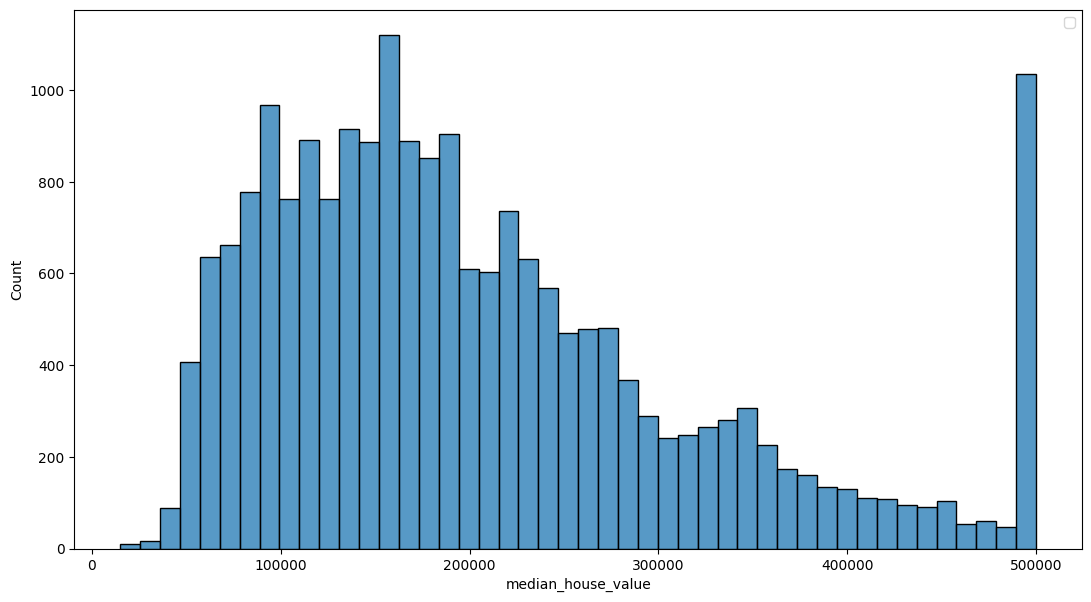

In [2]:
plt.figure(figsize=(13,7))
sns.histplot(df['median_house_value'])
plt.legend()

keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [3]:
df=df.query("ocean_proximity=='<1H OCEAN' or ocean_proximity=='INLAND'")
features=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']


df=df[features]
df.shape

(15687, 9)

# Question one
There's one feature with missing values. What is it? <br>

total_rooms <br>
total_bedrooms <br>
population <br>
households

In [4]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'population'?

995 <br>
1095 <br>
1195<br>
1295<br>

In [5]:
df['population'].median()

1195.0

# Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42. <br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [6]:
n=len(df)
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

n_train=int(.6*n)
n_val=int(.2*n)
n_test=int(.2*n)
n,n_test+n_train+n_val

df['median_house_value']=np.log1p(df['median_house_value'])

train=df.iloc[idx[:n_train]].reset_index()
val=df.iloc[idx[n_train:n_train+n_val]].reset_index()
test=df.iloc[idx[n_train+n_val:]].reset_index()


del train['index']
del test['index']
del val['index']
train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531
...,...,...,...,...,...,...,...,...,...
9407,33.92,-118.02,35.0,2075.0,424.0,1312.0,396.0,3.7969,12.012494
9408,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,12.604516
9409,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,10.618910
9410,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,13.122367


# Question 3
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>
Options:<br>

With 0<br>
With mean<br>
Both are equally good

### OPTION ONE FILL WITH O

In [8]:
def linear_regression(train,val):
    
    # ols function and train on training set
    train['total_bedrooms']=train['total_bedrooms'].fillna(0)
    y_train=train.iloc[:,-1].values
    x_train=train.iloc[:,:-1].values

    ones=np.ones(x_train.shape[0])
    x_train=np.column_stack([ones,x_train])

    xtx_train=x_train.T.dot(x_train)
    xtx_inv_train=np.linalg.inv(xtx_train)
    beta=xtx_inv_train.dot(x_train.T).dot(y_train)
    
    # prediction on validation set
    val['total_bedrooms']=val['total_bedrooms'].fillna(0)
    y_val=val.iloc[:,-1].values
    x_val=val.iloc[:,:-1].values
    
    ones=np.ones(x_val.shape[0])
    x_val=np.column_stack([ones,x_val])
    
    y_pred=np.dot(x_val,beta)
    
    # rmse
    error=y_val-y_pred
    rmse=np.sqrt((error**2).mean())
    return rmse

linear_regression(train,val)

0.3409235996349079

# option two fill with the mean

In [10]:
def linear_regression_mean(train,val):
    
    # ols function and train on training set
    train['total_bedrooms']=train['total_bedrooms'].fillna(train.total_bedrooms.mean())
    y_train=train.iloc[:,-1].values
    x_train=train.iloc[:,:-1].values

    ones=np.ones(x_train.shape[0])
    x_train=np.column_stack([ones,x_train])

    xtx_train=x_train.T.dot(x_train)
    xtx_inv_train=np.linalg.inv(xtx_train)
    beta=xtx_inv_train.dot(x_train.T).dot(y_train)
    
    # prediction on validation set
    val['total_bedrooms']=val['total_bedrooms'].fillna(0)
    y_val=val.iloc[:,-1].values
    x_val=val.iloc[:,:-1].values
    
    ones=np.ones(x_val.shape[0])
    x_val=np.column_stack([ones,x_val])
    
    y_pred=np.dot(x_val,beta)
    
    # rmse
    mse=((y_val-y_pred)**2).mean()
    rmse=np.sqrt(mse)
    return rmse

linear_regression_mean(train,val)==linear_regression(train,val)

True

# Question 4
Now let's train a regularized linear regression. <br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>

Options:<br>

0<br>
0.000001<br>
0.001
0.0001

In [11]:
def linear_regression_reg(train,val,r):
    
    # ols function and train on training set
    train['total_bedrooms']=train['total_bedrooms'].fillna(0)
    y_train=train.iloc[:,-1].values
    x_train=train.iloc[:,:-1].values

    ones=np.ones(x_train.shape[0])
    x_train=np.column_stack([ones,x_train])

    xtx_train=x_train.T.dot(x_train)
    xtx_train=xtx_train+r*np.eye(xtx_train.shape[0])
    xtx_inv_train=np.linalg.inv(xtx_train)
    beta=xtx_inv_train.dot(x_train.T).dot(y_train)
    
    # prediction on validation set
    val['total_bedrooms']=val['total_bedrooms'].fillna(0)
    y_val=val.iloc[:,-1].values
    x_val=val.iloc[:,:-1].values
    
    ones=np.ones(x_val.shape[0])
    x_val=np.column_stack([ones,x_val])
    
    y_pred=np.dot(x_val,beta)
    
    # rmse
    error=y_val-y_pred
    rmse=np.sqrt((error**2).mean())
    return rmse,r


In [12]:

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print(linear_regression_reg(train,val,r))


(0.3409235996349079, 0)
(0.3409236024241936, 1e-06)
(0.34092387856510203, 0.0001)
(0.3409264112964711, 0.001)
(0.34095384832072456, 0.01)
(0.34136358989088444, 0.1)
(0.3449756916797438, 1)
(0.3478195844881851, 5)
(0.3483946973484849, 10)


# Question 6
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?

In [12]:
n=len(df)
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

n_train=int(.8*n)
n_test=int(.2*n)


df['median_house_value']=np.log1p(df['median_house_value'])

train=df.iloc[idx[:n_train]].reset_index()

test=df.iloc[idx[n_train:]].reset_index()


del train['index']
del test['index']



In [63]:
def linear_regression_reg(train,val,r):
    
    # ols function and train on training set
    train['total_bedrooms']=train['total_bedrooms'].fillna(0)
    y_train=train.iloc[:,-1].values
    x_train=train.iloc[:,:-1].values

    ones=np.ones(x_train.shape[0])
    x_train=np.column_stack([ones,x_train])

    xtx_train=x_train.T.dot(x_train)
    xtx_train=xtx_train+r*np.eye(xtx_train.shape[0])
    xtx_inv_train=np.linalg.inv(xtx_train)
    beta=xtx_inv_train.dot(x_train.T).dot(y_train)
    
    # prediction on validation set
    val['total_bedrooms']=val['total_bedrooms'].fillna(0)
    y_val=val.iloc[:,-1].values
    x_val=val.iloc[:,:-1].values
    
    ones=np.ones(x_val.shape[0])
    x_val=np.column_stack([ones,x_val])
    
    y_pred=np.dot(x_val,beta)
    
    # rmse
    error=y_val-y_pred
    rmse=np.sqrt((error**2).mean())
    return rmse
linear_regression_reg(train,test,r=0.001)

0.3304954548672377